<h1>Project Question
<h4>Can the economic status of either recession or growth state  be determined by certain factors?
<h4> If, so what are those factors, do they have relations with one another?

I argue: Five main factors that  contribute to the economic status,  each factor  can determine the status and they have relational with each other. 
1. Increase unemployment: Decline in economic growth -  increase in recession  ✅
2. Bank Investment: An increase in stock market investments may signal confidence in economic growth. ✅
3. Reduced Consumer Spending: Economic uncertainty can lead consumers to cut back on spending.🔶
4. Cheap House Prices: Decline in economic growth - opposite – growth ✅
5. Low Repayment Rates: High defaults or low repayments may indicate economic recession..✅


##  Data 1: Unemployment rates (2000-2024)

In [1]:
import csv
import pandas as pd

In [2]:
def Read_Unemployment_rate(): # 
  my_df = pd.read_csv('data/unemployment_rate .csv') # stores data in my_df, each column has a coressponding header
  
# step 1: create a new column that has the avg of all the columns in each row
  month_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

  my_df['Average Yearly'] = my_df[month_columns].mean(axis=1) # avg for each year
  #print(my_df[['Year','Average Yearly']].to_string(index=False)) # returns a table of : year, avg_year, get ride of indexing

# step 2: find the avg of the 24 years, then  will compare each avg_year to total_avg
  total_avg = my_df['Average Yearly'].mean() # avg of 23 years is 5.663
  #print('Average Unemployment Rate in 24 years:', total_avg)

# step 3: determine if each year: recession, growth
  Status_growth_recession = []

  for avg in my_df['Average Yearly']:
      if avg < total_avg:
        Status_growth_recession.append('Growth')
      
      elif avg > total_avg:
        Status_growth_recession.append('Recession')

      else:
              Status_growth_recession.append('No Economic Change')

  my_df['Economic Status'] = Status_growth_recession

  # add status to the table
  status_table = my_df[['Year', 'Average Yearly', 'Economic Status']].to_string(index=False) # one table
  #print(status_table)

  # my df, create table, search for growth in year and Average Yearly
  growth_df = my_df[my_df['Economic Status'] == 'Growth'][['Year', 'Average Yearly']]
  recession_df = my_df[my_df['Economic Status'] == 'Recession'][['Year','Average Yearly']] # add 'Average Yearly' to see avg ununemployment
  return growth_df,recession_df

Read_Unemployment_rate()


(    Year  Average Yearly
 0   2000        3.966667
 1   2001        4.741667
 4   2004        5.541667
 5   2005        5.083333
 6   2006        4.608333
 7   2007        4.616667
 15  2015        5.275000
 16  2016        4.875000
 17  2017        4.358333
 18  2018        3.891667
 19  2019        3.675000
 21  2021        5.350000
 22  2022        3.633333
 23  2023        3.625000
 24  2024        4.000000,
     Year  Average Yearly
 2   2002        5.783333
 3   2003        5.991667
 8   2008        5.800000
 9   2009        9.283333
 10  2010        9.608333
 11  2011        8.933333
 12  2012        8.075000
 13  2013        7.358333
 14  2014        6.158333
 20  2020        8.091667)

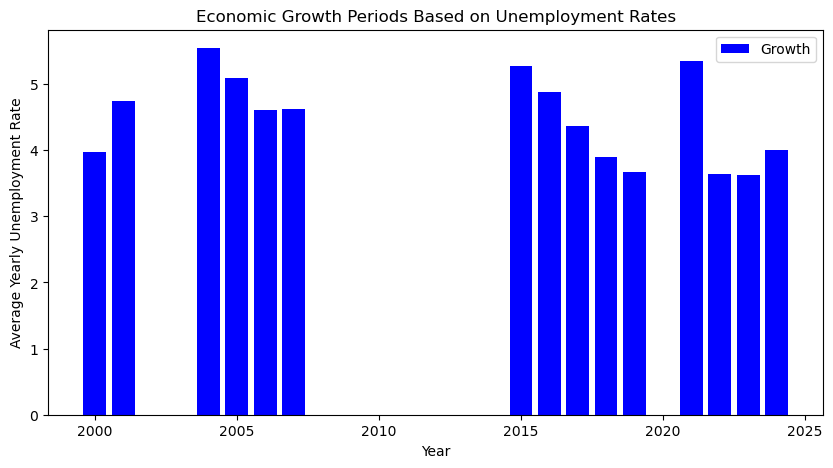

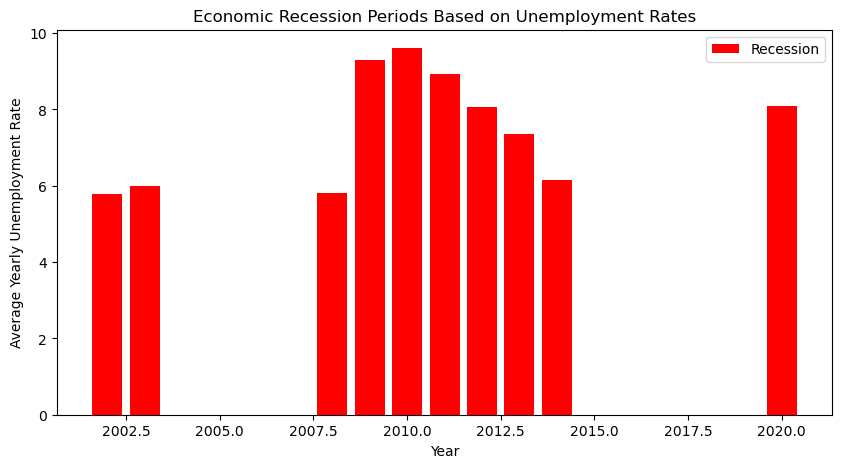

In [3]:
import matplotlib.pyplot as plt

growth_df, recession_df = Read_Unemployment_rate() #  def returns growth_df, recession_df  save them in new variables 

# bar chart for growth
plt.figure(figsize=(10, 5))
# x = year, and y = average per eyar
plt.bar(growth_df['Year'], growth_df['Average Yearly'], color='blue', label='Growth')
plt.xlabel('Year')
plt.ylabel('Average Yearly Unemployment Rate')
plt.title('Economic Growth Periods Based on Unemployment Rates')
plt.legend()
plt.show()

# bar chart for recession
plt.figure(figsize=(10, 5))
# x = year, y = averge per year 
plt.bar(recession_df['Year'], recession_df['Average Yearly'], color='red', label='Recession')
plt.xlabel('Year')
plt.ylabel('Average Yearly Unemployment Rate')
plt.title('Economic Recession Periods Based on Unemployment Rates')
plt.legend()
plt.show()


**Based on Observation Data 1:**
- The unemployment rate was high in 2008, 2009, 2010, and 2020.
- This demonstrates that unemployment is a factor that affects economic status.
- These findings are significant since they can be explained by the 2008 recession and the 2020 pandemic.
    - "The US economy in 2004 was strong, with growth in real GDP of 4.4%, the highest rate since 1999"
- There was a decrease in unemployment following the pandemic in 2021.

----

## Data 2: Bank Investment (2000-2024)

- What I noticed - the years have four rows. this is a quartly report
- Clean data to have 5 columns ( Year, Quarters)
- Then find the average all years
- find the average of each year
- if year < average(whole) - reccession
- if year > average(whole) - growth

In [4]:
import csv
import pandas as pd

# step 1. read

with open("data/bank-investment.csv") as bank_csv:
  bank_csv = csv.DictReader(bank_csv)

# step 2. make quarter column 
  for item in bank_csv:
      convert_data = pd.DataFrame(bank_csv)
      convert_data['Year'] = pd.to_datetime(convert_data['DATE']).dt.year # new column year using date column
      convert_data['Quarter'] = pd.to_datetime(convert_data['DATE']).dt.quarter # new columns quarter using dat4 column, 
      # challenge: theres 4 quarter each year, remove BOGZ1FU745013023Q by turing it into 4 columns  

convert_data

,DATE,BOGZ1FU745013023Q,Year,Quarter
0,2000-04-01,24.0,2000,2
1,2000-07-01,24.0,2000,3
2,2000-10-01,24.0,2000,4
3,2001-01-01,23.0,2001,1
4,2001-04-01,22.0,2001,2
...,...,...,...,...
92,2023-04-01,22.0,2023,2
93,2023-07-01,22.0,2023,3
94,2023-10-01,22.0,2023,4
95,2024-01-01,22.0,2024,1


In [5]:
# source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html
# step 3. make quart 1-4 column, remove column BOGZ1FU745013023Q by passing its values to the quarters
data_table = convert_data.pivot(index='Year', columns='Quarter', values='BOGZ1FU745013023Q')

data_table.columns = ['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4']

data_table.reset_index(inplace=True) # index to defult setting, each year has four columns directly corsponeing to index


data_table

,Year,Quarter 1,Quarter 2,Quarter 3,Quarter 4
0,2000,NaN,24.0,24.0,24.0
1,2001,23.0,22.0,21.0,21.0
2,2002,22.0,22.0,22.0,21.0
3,2003,23.0,24.0,24.0,25.0
4,2004,23.0,24.0,24.0,25.0
5,2005,22.0,22.0,23.0,23.0
6,2006,26.0,27.0,27.0,27.0
7,2007,8.0,9.0,9.0,9.0
8,2008,18.0,18.0,18.0,16.0
9,2009,16.0,15.0,15.0,16.0


In [6]:
print(data_table[['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4']].dtypes)
print(data_table[['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4']].head())

Quarter 1    object
Quarter 2    object
Quarter 3    object
Quarter 4    object
dtype: object
  Quarter 1 Quarter 2 Quarter 3 Quarter 4
0       NaN      24.0      24.0      24.0
1      23.0      22.0      21.0      21.0
2      22.0      22.0      22.0      21.0
3      23.0      24.0      24.0      25.0
4      23.0      24.0      24.0      25.0


In [7]:
print(data_table.dtypes)

Year          int32
Quarter 1    object
Quarter 2    object
Quarter 3    object
Quarter 4    object
dtype: object


In [8]:
'''
Step 4. find the average of each year
Step 5. if average(whole) > year - reccession
Step 6. average(whole) < year - growth

'''

def analyze_bank_investments():

    data_table[['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4']] = data_table[['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4']
    ].replace('NaN', None).fillna(0).astype(float)
    # error to fix about data types, directly type cast it 
    #source to deal with NaN value: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
    
    # step 1. average for each year
    data_table['Average Yearly'] = data_table[['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4']].mean(axis=1)
    # step 2: average for all 24 years
    total_avg = data_table['Average Yearly'].mean() # avg of 24 years is 18.57

    # step 3: determine if each year: recession, growth
    # if below the whole average that means banking invement is low thus recession?
    Status_growth_recession = []

    for item in data_table['Average Yearly']:
        if item < total_avg:
            Status_growth_recession.append('Recession')
        elif item > total_avg:
            Status_growth_recession.append('Growth')
        else:
            Status_growth_recession.append('No Economic Change')

    data_table['Economic Status'] = Status_growth_recession
    return data_table


result = analyze_bank_investments()
result

,Year,Quarter 1,Quarter 2,Quarter 3,Quarter 4,Average Yearly,Economic Status
0,2000,0.0,24.0,24.0,24.0,18.00,Growth
1,2001,23.0,22.0,21.0,21.0,21.75,Growth
2,2002,22.0,22.0,22.0,21.0,21.75,Growth
3,2003,23.0,24.0,24.0,25.0,24.00,Growth
4,2004,23.0,24.0,24.0,25.0,24.00,Growth
5,2005,22.0,22.0,23.0,23.0,22.50,Growth
6,2006,26.0,27.0,27.0,27.0,26.75,Growth
7,2007,8.0,9.0,9.0,9.0,8.75,Recession
8,2008,18.0,18.0,18.0,16.0,17.50,Recession
9,2009,16.0,15.0,15.0,16.0,15.50,Recession


- Huge drop in 2007 leading up to the 2008 economic crash
- sprisingly 2020 aveerage was higher by 2 points.
  - Google: "Yes, investment banking was high in 2020, with record revenues and a high return on equity (ROE): "

In [134]:
# source: https://plotly.com/python/plotly-express/
#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
#https://plotly.com/python/bar-charts/

''' Direct Source from  https://plotly.com/python/bar-charts/
            import plotly.express as px
            
            df = px.data.gapminder().query("continent == 'Oceania'")
            fig = px.bar(df, x='year', y='pop',
            hover_data=['lifeExp', 'gdpPercap'], color='country',
            labels={'pop':'population of Canada'}, height=400)
            fig.show()

'''
import plotly.express as px
import pandas as pd

# 1. Bar Chart  for the average of each year 

the_bar = px.bar(result, 
                 x="Year", 
                 y="Average Yearly", 
                 color="Economic Status",  
                 title="Bank Investment: The Average Of Each Year ",
                 labels={"Average Yearly": "Average Rate of Investment", "Year": "The Year"})


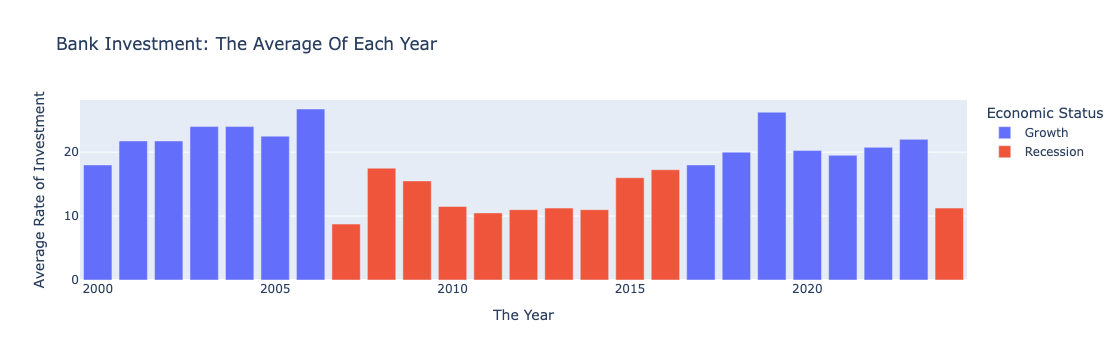

In [135]:
the_bar.show()

In [136]:
# 2. Scatter Matrix
# source: https://plotly.com/python/plotly-express/

''' Direct Source from https://plotly.com/python/plotly-express/
        import plotly.express as px
        df = px.data.iris()
        fig = px.scatter_matrix(df, dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], color="species")
        fig.show()


'''

import plotly.express as px
the_scatter = px.scatter_matrix(result,
                                dimensions=["Year", "Average Yearly"],  # X,Y axis 
                                color="Economic Status",  
                                title="Scatter Matrix of Year vs Average Yearly Investment")


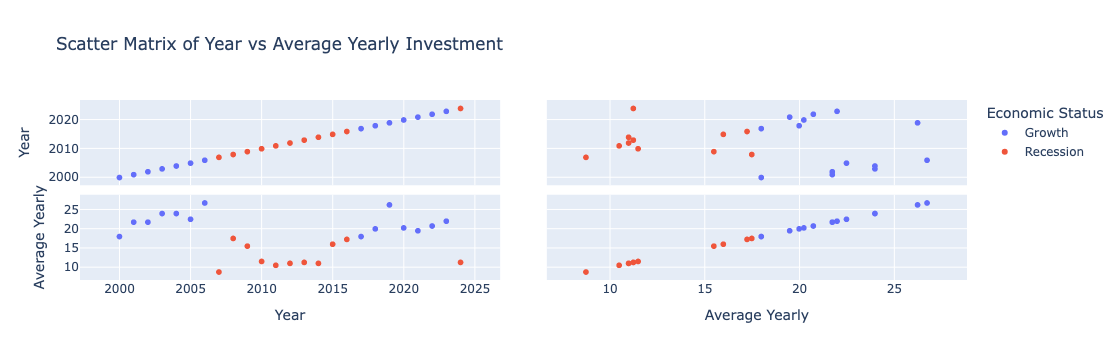

In [137]:
the_scatter.show()


**Based on Observation Data 2:**
- I was surprised to see this data having similar mapping to Data 1 ( Unemployment rates).
-  The genuine difference lies in 2020, with Unemployment rates 2020 was a recession,
-  however, due to strong investment rates, it is classfied as growth in this data.


----

##  Data 3: Consumption rates (2000-2023)

- no need to clean data, just use the same method to classify economic status than visulize 
- If consumption < avg: recession
- if consumption > avg: growth 

In [138]:
def analyze_consumer_spending():
    consumer_data = pd.read_csv('data/consumer_spending.csv') 
    #consumer_data.info()
  
    total_avg = consumer_data['PCECA'].mean() #11404.420666666667
    
    Status_growth_recession = []

    for house_price in consumer_data['PCECA']:
        if house_price < total_avg:
            Status_growth_recession.append('Recession')
        elif house_price > total_avg:
            Status_growth_recession.append('Growth')
        else:
            Status_growth_recession.append('No Economic Change')

    consumer_data['Economic Status'] = Status_growth_recession
    return consumer_data


result_3 = analyze_consumer_spending()
result_3

,DATE,PCECA,Economic Status
0,2000-01-01,6767.179,Recession
1,2001-01-01,7073.801,Recession
2,2002-01-01,7348.941,Recession
3,2003-01-01,7740.749,Recession
4,2004-01-01,8231.960,Recession
5,2005-01-01,8769.066,Recession
6,2006-01-01,9277.236,Recession
7,2007-01-01,9746.594,Recession
8,2008-01-01,10050.083,Recession
9,2009-01-01,9891.218,Recession


In [152]:
import pandas as pd
import matplotlib.pyplot as plt

avg_pceca_per_year_status = result_3.groupby(['DATE', 'Economic Status'])['PCECA'].mean().unstack()

avg_pceca_per_year_status.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.xlabel('The Year')
plt.ylabel('The Average PCECA')
plt.title('The Average Consumer Spending (PCECA) by Year')
plt.show()


<IPython.core.display.Javascript object>

**Based on Observation Data 3:**
- The PCECA (Personal Consumption Expenditures) has linear imporvment - why is consumption gradually increasing\
              - Perphas it due to population growth
- I do not think Consumption rate can be a strong factor in econmic status due to the fact that is is linear growth, this does not capture the cycle of the economy I have seen thus far



---

## Data 4 and 5: House Price, Loan Payments (2000-2024)

- This data is from the same cite, therefore the code will be similar to data 2
- I will work with both data at the same time for efficency 

In [140]:
import csv
import pandas as pd

# combine data 2 into a single function, pass the file, to prevent from making 2 functions
def read(file, values):
    data = pd.read_csv(file)
    
    data['DATE'] = pd.to_datetime(data['DATE'])
    data['Year'] = data['DATE'].dt.year
    data['Quarter'] = data['DATE'].dt.quarter
    
    data_table = data.pivot_table(index='Year', columns='Quarter', values=values, aggfunc='mean')

    data_table.columns = ['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4']
    
    data_table.reset_index(inplace=True)

    return data_table

data_loan = read('data/loan_payments.csv', 'RCCCBSHRFULL')
data_house = read('data/housing_prices.csv', 'MSPUS')

In [141]:
data_loan

,Year,Quarter 1,Quarter 2,Quarter 3,Quarter 4
0,2012,NaN,NaN,24.70,26.48
1,2013,28.03,28.41,27.19,27.53
2,2014,29.17,28.12,27.87,27.74
3,2015,29.06,28.15,27.66,27.99
4,2016,29.04,27.56,27.81,27.57
5,2017,28.92,28.23,27.90,27.95
6,2018,29.74,30.22,29.62,29.89
7,2019,30.95,30.76,30.39,30.49
8,2020,31.31,30.76,31.92,32.80
9,2021,34.71,35.12,34.49,34.59


In [142]:
data_house

,Year,Quarter 1,Quarter 2,Quarter 3,Quarter 4
0,2000,165300.0,163200.0,168800.0,172900.0
1,2001,169800.0,179000.0,172500.0,171100.0
2,2002,188700.0,187200.0,178100.0,190100.0
3,2003,186000.0,191800.0,191900.0,198800.0
4,2004,212700.0,217600.0,213500.0,228800.0
5,2005,232500.0,233700.0,236400.0,243600.0
6,2006,247700.0,246300.0,235600.0,245400.0
7,2007,257400.0,242200.0,241800.0,238400.0
8,2008,233900.0,235300.0,226500.0,222500.0
9,2009,208400.0,220900.0,214300.0,219000.0


In [143]:
# 2. Find the avg, classify each year

def analyze_loan_house(table):

    # step 1. average for each year
    table['Average Yearly'] = data_table[['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4']].mean(axis=1)
    # step 2: average for all 24 years
    total_avg = table['Average Yearly'].mean() # avg of 24 years 

    # step 3: determine if each year: recession, growth
    # if below the whole average that means banking invement is low thus recession?
    Status_growth_recession = []

    for item in table['Average Yearly']:
        if item < total_avg:
            Status_growth_recession.append('Recession')
        elif item > total_avg:
            Status_growth_recession.append('Growth')
        else:
            Status_growth_recession.append('No Economic Change')

    table['Economic Status'] = Status_growth_recession
    return table    

In [144]:
house = analyze_loan_house(data_house)
house

,Year,Quarter 1,Quarter 2,Quarter 3,Quarter 4,Average Yearly,Economic Status
0,2000,165300.0,163200.0,168800.0,172900.0,18.00,Growth
1,2001,169800.0,179000.0,172500.0,171100.0,21.75,Growth
2,2002,188700.0,187200.0,178100.0,190100.0,21.75,Growth
3,2003,186000.0,191800.0,191900.0,198800.0,24.00,Growth
4,2004,212700.0,217600.0,213500.0,228800.0,24.00,Growth
5,2005,232500.0,233700.0,236400.0,243600.0,22.50,Growth
6,2006,247700.0,246300.0,235600.0,245400.0,26.75,Growth
7,2007,257400.0,242200.0,241800.0,238400.0,8.75,Recession
8,2008,233900.0,235300.0,226500.0,222500.0,17.50,Recession
9,2009,208400.0,220900.0,214300.0,219000.0,15.50,Recession


In [145]:
loan = analyze_loan_house(data_loan)
loan

,Year,Quarter 1,Quarter 2,Quarter 3,Quarter 4,Average Yearly,Economic Status
0,2012,NaN,NaN,24.70,26.48,18.00,Growth
1,2013,28.03,28.41,27.19,27.53,21.75,Growth
2,2014,29.17,28.12,27.87,27.74,21.75,Growth
3,2015,29.06,28.15,27.66,27.99,24.00,Growth
4,2016,29.04,27.56,27.81,27.57,24.00,Growth
5,2017,28.92,28.23,27.90,27.95,22.50,Growth
6,2018,29.74,30.22,29.62,29.89,26.75,Growth
7,2019,30.95,30.76,30.39,30.49,8.75,Recession
8,2020,31.31,30.76,31.92,32.80,17.50,Recession
9,2021,34.71,35.12,34.49,34.59,15.50,Recession


### Visualization Data 4 and 5

In [146]:
import matplotlib.pyplot as plt

# source: https://rpubs.com/Mentors_Ubiqum/autoplot
# source: https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
# write function and just pass it due to reduce code lines

def plot_time_series(data, column, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Year'], data[column], marker='o', label=column)
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

plot_time_series(house, 'Average Yearly', '24 years Average  Housing Prices')
plot_time_series(loan, 'Average Yearly', ' 12 years Average Loan Payments')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [147]:
# Data: House (similar to data 1)
growth_df_loan = house[house['Economic Status'] == 'Growth']
recession_df_loan = house[house['Economic Status'] == 'Recession']

#growth
plt.figure(figsize=(8, 5))
plt.bar(growth_df_loan['Year'], growth_df_loan['Average Yearly'], color='blue', label='Growth')
plt.xlabel('Year')
plt.ylabel('House Price: Average Yearly')
plt.title('House Price : Economic Growth ')
plt.legend()
plt.show()


# recession
plt.figure(figsize=(8, 5))
plt.bar(recession_df_loan['Year'], recession_df_loan['Average Yearly'], color='pink', label='Recession')
plt.xlabel('Year')
plt.ylabel('House Price: Average Yearly')
plt.title('House Price : Economic Recession ')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [148]:
# Data: House (similar to data 1)
growth_df_loan = loan[loan['Economic Status'] == 'Growth']
recession_df_loan = loan[loan['Economic Status'] == 'Recession']

#growth
plt.figure(figsize=(8, 5))
plt.bar(growth_df_loan['Year'], growth_df_loan['Average Yearly'], color='green', label='Growth')
plt.xlabel('Year')
plt.ylabel('Loan Data: Average Yearly')
plt.title('Loan Data : Economic Growth ')
plt.legend()
plt.show()


# recession
plt.figure(figsize=(8, 5))
plt.bar(recession_df_loan['Year'], recession_df_loan['Average Yearly'], color='red', label='Recession')
plt.xlabel('Year')
plt.ylabel('Loan Data: Average Yearly')
plt.title('Loan Data : Economic Recession ')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

**Based on Observation Data 4,5:**
- Growth: loan data indicts that 2012-18 was growth period, however, 2012-16 during house prices considers it to be recession
- Recession:  loan data indicts 2019-24 to decline period, however, 2017-2024 is considred gorth in loan payment 
- Question: why is there a flip result from loan payment to house price rates